In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the data

## Check the genes with high specificity in the brain

In [2]:
df = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/human_atlas/results/cell_type_specificity/markers_wilcox_tissue-cell_max-1000.tsv", sep="\t")

In [14]:
# Number of clusters
n_clusters = len(df["cluster"].unique())

# Merge gene names
gene_names = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/datasets/Alzheimer/CSF_proteomics_AD_onset/gene_id_symbol_df.tsv", sep="\t").rename(columns={"gene_ids": "gene", "gene_symbols": "gene_name"})
final_df = df.merge(gene_names, how="left", on="gene")

# Extract tissue and cell types
final_df["tissue"] = final_df["cluster"].apply(lambda x: x.split(":")[0])
final_df["cell_type"] = final_df["cluster"].apply(lambda x: x.split(":")[1])
n_tissues = len(final_df["tissue"].unique())
n_cells = len(final_df["cell_type"].unique())

In [28]:
# Overlap genes in Nature paper with atlas
disease = "Alzheimer's dementia"
prot_df = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4_tmp.tsv", sep="\t", index_col="Unnamed: 0")
prot_df["gene_name"] = prot_df["Predictor"].apply(lambda x: x.split(".")[0])
prot_df["ci_outside_1"] = ((prot_df["LCI"] > 1.0) | (prot_df["UCI"] < 1.0))

prot_specific = prot_df[prot_df["Outcome"] == disease]

In [52]:
# Merge the two
prot_atlas = prot_specific.merge(final_df, how="left", on="gene_name").dropna()

In [45]:
# Count the number of tissues for each cell type (top genes are mostly immune)
prot_atlas[["tissue", "cell_type"]].groupby("cell_type")["tissue"].nunique().to_frame().sort_values(by="tissue", ascending=False).head(5)

,tissue
cell_type,
macrophage,27
T cell,20
fibroblast,18
mature NK T cell,16
endothelial cell,16


In [65]:
# Calculate max avg log2fc for each gene
max_avg_log2fc = prot_atlas.loc[prot_atlas.groupby('gene_name')['avg_log2FC'].idxmax()]

In [79]:
brain_regions = ["dorsolateral prefrontal cortex", "middle temporal gyrus", "angular gyrus"]
max_avg_log2fc_sig_genes = max_avg_log2fc[(max_avg_log2fc["ci_outside_1"]) & (max_avg_log2fc["tissue"].isin(brain_regions))]
max_avg_log2fc_sig_genes[["gene_name", "tissue", "cell_type", "avg_log2FC", "P.Value"]].sort_values(by="avg_log2FC", ascending=False).head(40)

,gene_name,tissue,cell_type,avg_log2FC,P.Value
34599,ACVRL1,dorsolateral prefrontal cortex,cerebral cortex endothelial cell,10.143899,2.320000e-02
42019,BST2,middle temporal gyrus,cerebral cortex endothelial cell,9.828073,3.810000e-02
33813,EPHA2,dorsolateral prefrontal cortex,vascular leptomeningeal cell,8.540105,2.270000e-02
28331,SUSD2,dorsolateral prefrontal cortex,vascular leptomeningeal cell,8.523788,1.670000e-02
3,GFAP,dorsolateral prefrontal cortex,astrocyte of the cerebral cortex,7.277635,2.830000e-53
35265,PIK3AP1,middle temporal gyrus,microglial cell,7.130358,2.400000e-02
38294,IL18,middle temporal gyrus,microglial cell,6.136988,3.010000e-02
13174,CNDP1,middle temporal gyrus,oligodendrocyte,5.968187,2.650000e-03
37526,GPC5,angular gyrus,astrocyte of the cerebral cortex,5.933930,2.780000e-02
18917,AREG,middle temporal gyrus,vip GABAergic cortical interneuron,5.779522,5.050000e-03


In [80]:
# Individual gene inspection
final_df[final_df["gene_name"] == "SPINK4"].sort_values("avg_log2FC", ascending=False)[["gene_name", "tissue", "cell_type", "avg_log2FC"]].head(20)

,gene_name,tissue,cell_type,avg_log2FC
3923085,SPINK4,angular gyrus,L5 extratelencephalic projecting glutamatergic...,4.594449


## Check the genes based on cell types only

In [2]:
df = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/human_atlas/results/cell_type_specificity/markers_wilcox_cell_max-1000_downsamp.tsv", sep="\t")

In [3]:
# Number of clusters
n_clusters = len(df["cluster"].unique())

# Merge gene names
gene_names = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/datasets/Alzheimer/CSF_proteomics_AD_onset/gene_id_symbol_df.tsv", sep="\t").rename(columns={"gene_ids": "gene", "gene_symbols": "gene_name"})
final_df = df.merge(gene_names, how="left", on="gene").rename(columns={"cluster": "cell_type"})

# Extract cell types
n_cells = len(final_df["cell_type"].unique())

In [4]:
# Overlap genes in Nature paper with atlas
disease = "Alzheimer's dementia"
prot_df = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4_tmp.tsv", sep="\t", index_col="Unnamed: 0")
prot_df["gene_name"] = prot_df["Predictor"].apply(lambda x: x.split(".")[0])
prot_df["ci_outside_1"] = ((prot_df["LCI"] > 1.0) | (prot_df["UCI"] < 1.0))

prot_specific = prot_df[prot_df["Outcome"] == disease]

# Merge the two
prot_atlas = prot_specific.merge(final_df, how="left", on="gene_name").dropna()

In [5]:
# Calculate max avg log2fc for each gene
max_avg_log2fc = prot_atlas.loc[prot_atlas.groupby('gene_name')['avg_log2FC'].idxmax()]

# Extract only significant genes
max_avg_log2fc_sig_genes = max_avg_log2fc[(max_avg_log2fc["ci_outside_1"])]

In [6]:
max_avg_log2fc_sig_genes[["gene_name", "cell_type", "avg_log2FC", "P.Value", "HR"]].sort_values(by="HR", ascending=False).head(40)

,gene_name,cell_type,avg_log2FC,P.Value,HR
54,GFAP,astrocyte of the cerebral cortex,9.243537,2.830000e-53,2.25
166,NEFL,Mueller cell,3.873071,9.000000e-26,1.77
266,GDF15,bladder urothelial cell,6.378637,1.690000e-10,1.42
305,BRK1,platelet,1.990856,1.640000e-08,1.31
927,WNT9A,small intestine goblet cell,5.694206,1.100000e-05,1.25
1009,SPP1,kidney epithelial cell,4.630120,1.470000e-05,1.23
1114,CEACAM5,paneth cell of colon,6.725437,1.730000e-05,1.23
1778,ACTA2,vascular associated smooth muscle cell,6.152659,1.720000e-04,1.22
1341,LTBP2,mesenchymal stem cell,5.478004,1.060000e-04,1.22
4158,MMP3,stromal cell,7.766400,1.580000e-03,1.21


## Compare these genes with Human Protein Atlas

In [2]:
protein_atlas_path = "/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/human_protein_atlas"
gene_types = pd.read_csv(f"{protein_atlas_path}/gene_types.tsv", sep="\t")

# Explore the data for COPD

## Some data visualization

In [2]:
df = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/human_atlas/results/cell_type_specificity/markers_wilcox_cell_max-1000_downsamp.tsv", sep="\t")

In [3]:
# Number of clusters
n_clusters = len(df["cluster"].unique())

# Merge gene names
gene_names = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/datasets/Alzheimer/CSF_proteomics_AD_onset/gene_id_symbol_df.tsv", sep="\t").rename(columns={"gene_ids": "gene", "gene_symbols": "gene_name"})
final_df = df.merge(gene_names, how="left", on="gene").rename(columns={"cluster": "cell_type"})

# Extract cell types
n_cells = len(final_df["cell_type"].unique())

In [54]:
# Overlap genes in Nature paper with atlas
disease = "COPD"
prot_df = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4_tmp.tsv", sep="\t", index_col="Unnamed: 0")

# With COPD, use author's original threshold
prot_df["gene_name"] = prot_df["Predictor"].apply(lambda x: x.split(".")[0])
#prot_df["ci_outside_1"] = ((prot_df["LCI"] > 1.0) | (prot_df["UCI"] < 1.0))

prot_specific = prot_df[prot_df["Outcome"] == disease]

# Merge the two
prot_atlas = prot_specific.merge(final_df, how="left", on="gene_name").dropna()

# Calculate max avg log2fc for each gene
max_avg_log2fc = prot_atlas.loc[prot_atlas.groupby('gene_name')['avg_log2FC'].idxmax()]

# Extract only significant genes
thres = 3.1e-6
max_avg_log2fc["significant"] = max_avg_log2fc["P.Value"].apply(lambda x: True if x <= thres else False)
max_avg_log2fc_sig_genes = max_avg_log2fc[max_avg_log2fc["significant"]]

In [65]:
max_avg_log2fc_sig_genes[["gene_name", "cell_type", "avg_log2FC", "P.Value", "HR"]].sort_values(by="HR", ascending=False).head(10)

,gene_name,cell_type,avg_log2FC,P.Value,HR
78,CXCL17,respiratory goblet cell,5.573281,0.000000e+00,2.61
125,WFDC2,duct epithelial cell,6.202470,6.510000e-307,2.58
320,GDF15,bladder urothelial cell,6.378637,1.700000e-265,2.44
397,LAMP3,type II pneumocyte,8.811970,1.620000e-246,2.29
459,PLAUR,corneal epithelial cell,4.305370,1.730000e-244,2.22
592,TNFRSF10B,endothelial cell of vascular tree,3.010317,5.960000e-217,2.19
635,ALPP,type I pneumocyte,8.089865,5.080000e-216,2.14
766,MMP12,fibroblast of breast,6.990190,4.200000e-186,2.07
668,PIGR,enterocyte,5.530908,1.830000e-196,2.03
936,PRSS8,luminal epithelial cell of mammary gland,4.785446,1.760000e-152,1.92


In [61]:
# Count number of genes in each cell type
max_avg_log2fc_sig_genes["cell_type"].value_counts().to_frame().head(10)

,count
cell_type,
neutrophil,44
macrophage,23
microglial cell,18
hepatocyte,18
corneal epithelial cell,16
CD1c-positive myeloid dendritic cell,15
oligodendrocyte,15
oligodendrocyte precursor cell,13
vip GABAergic cortical interneuron,12


In [63]:
max_avg_log2fc_sig_genes[max_avg_log2fc_sig_genes["cell_type"] == "oligodendrocyte"]["gene_name"]

54395     ALCAM
17672     APLP1
57371       APP
19976     EDIL3
45477     ENPP2
33930     FGFR2
19855     GPR37
19050     IGSF8
56416      LHPP
48111    MEGF10
12657     NCAM1
54861     NCAM2
45679     NFASC
49531     SORT1
56775    SPOCK1
Name: gene_name, dtype: object

/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

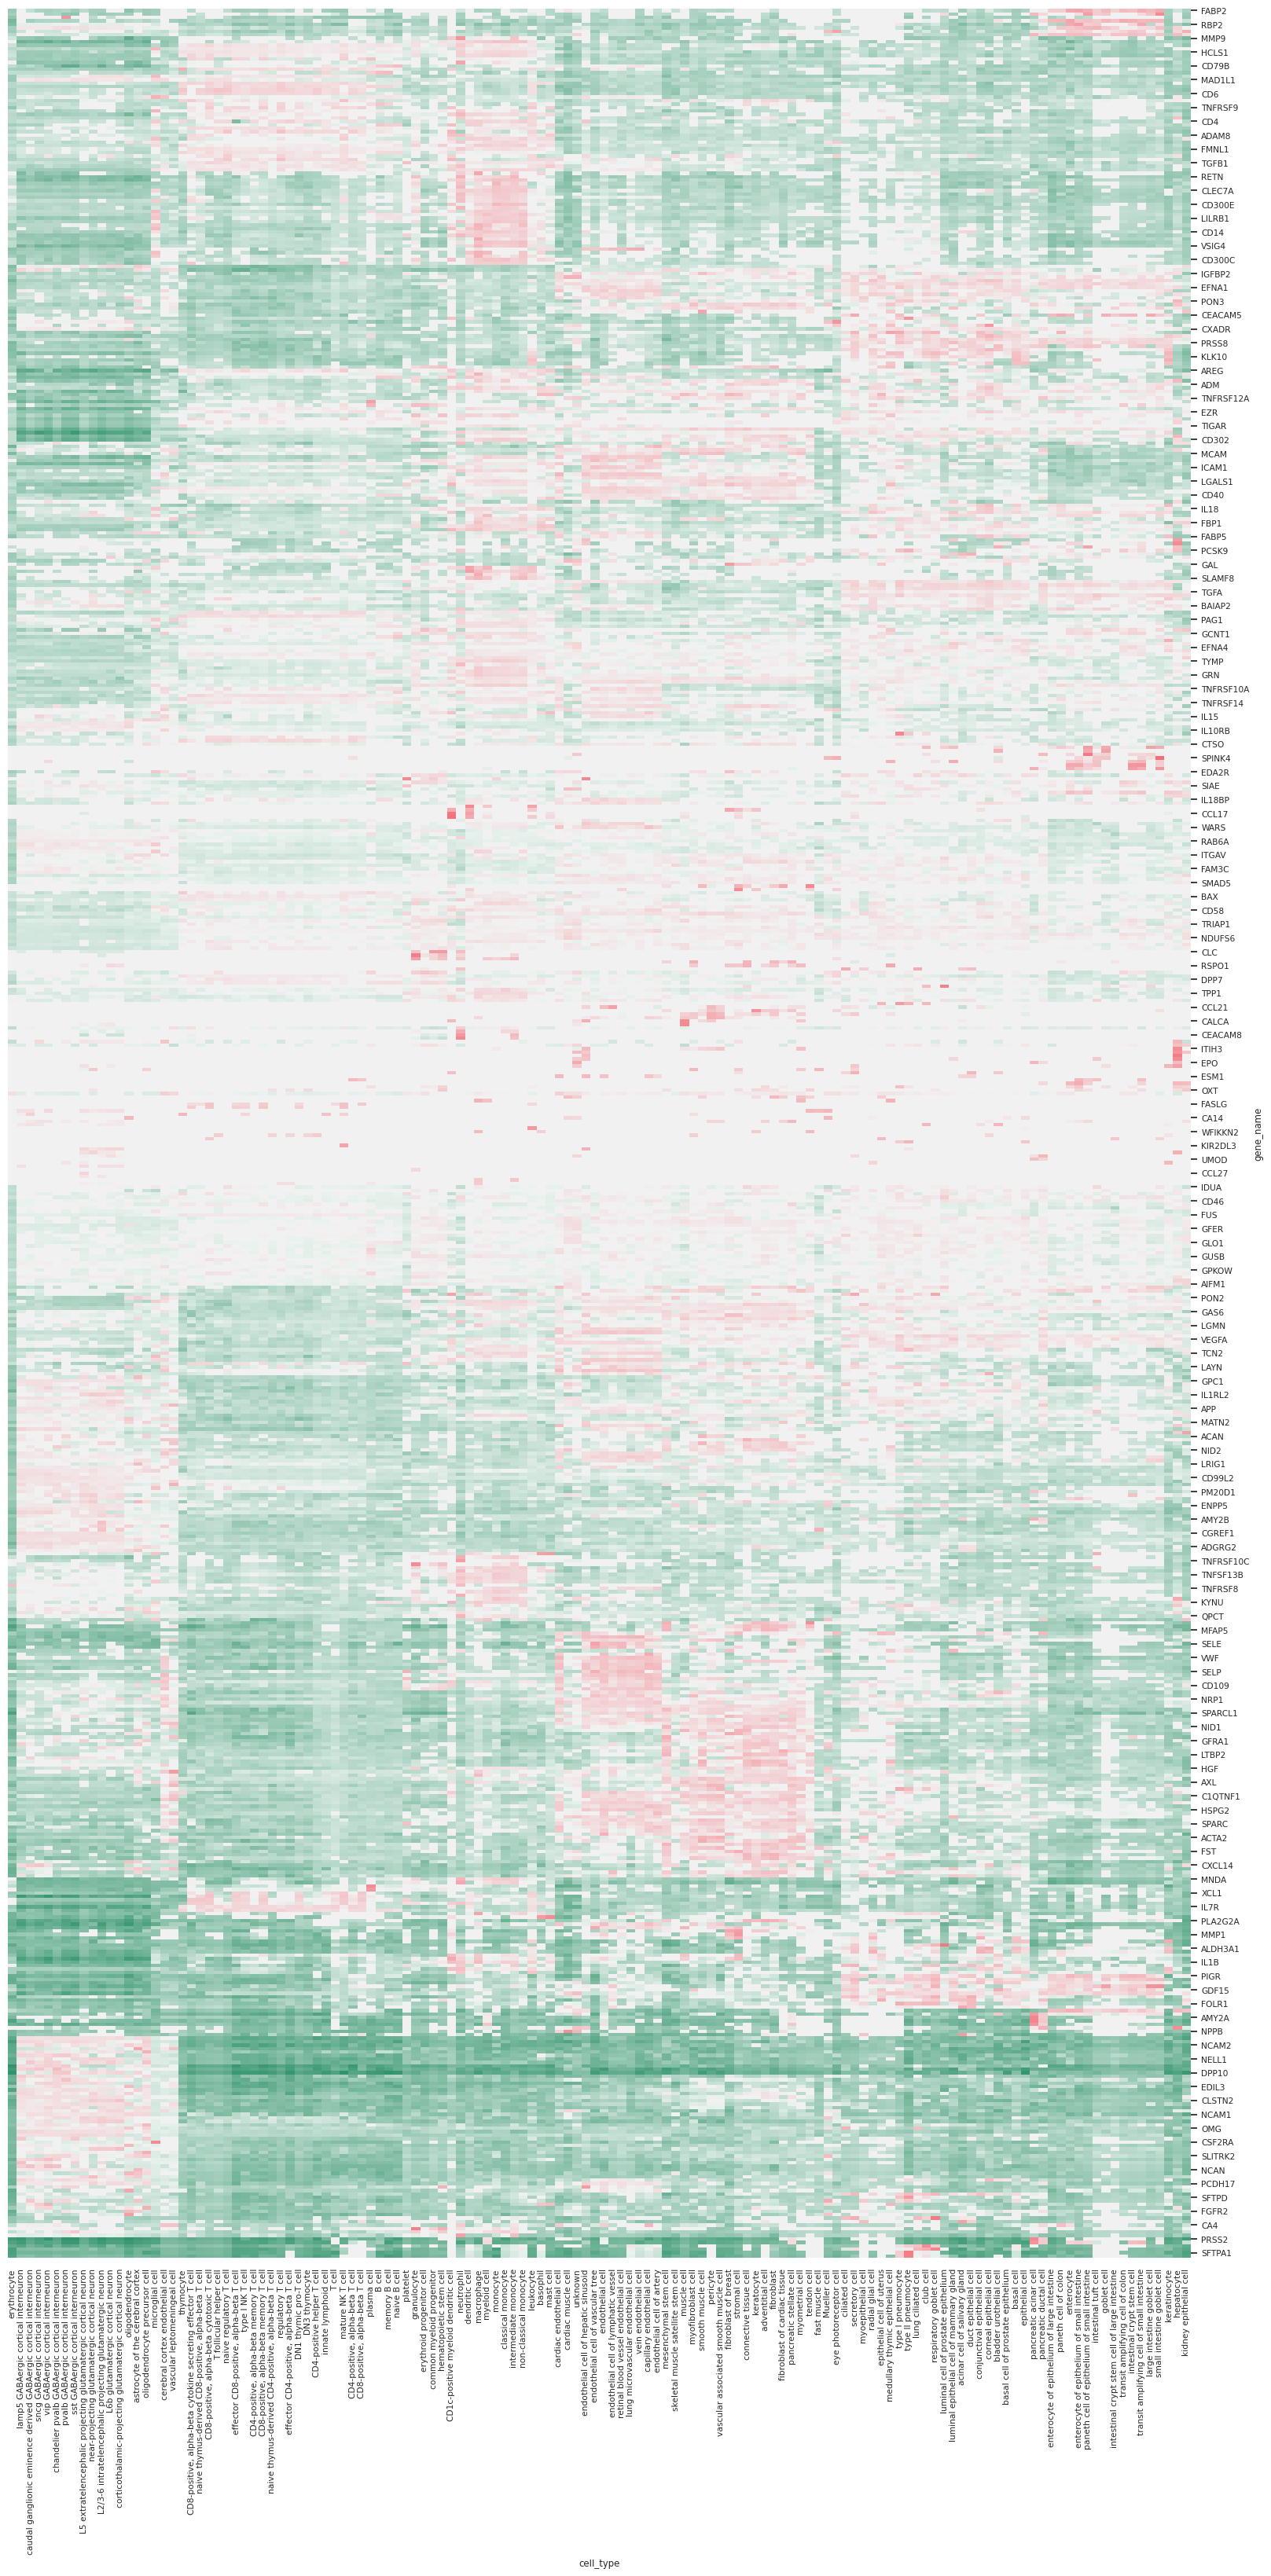

In [29]:
# Make a heatmap of log2 of genes
thres = 3.1e-6
prot_atlas_sub = prot_atlas[prot_atlas["P.Value"] <= thres]
prot_atlas_sub = prot_atlas_sub[["gene_name", "cell_type", "avg_log2FC"]]
prot_atlas_sub = pd.pivot_table(prot_atlas_sub, values="avg_log2FC", index="gene_name", columns="cell_type").fillna(0.0)

cmap = sns.diverging_palette(150, 10, s=85, l=55, center="light", as_cmap=True)
sns.set(font_scale=0.7)
plt.figure()
cg = sns.clustermap(prot_atlas_sub, center=0.0, cmap=cmap, figsize=(20, 40), xticklabels=True)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
cg.cax.set_visible(False)
plt.show()

## Run some correlation analysis

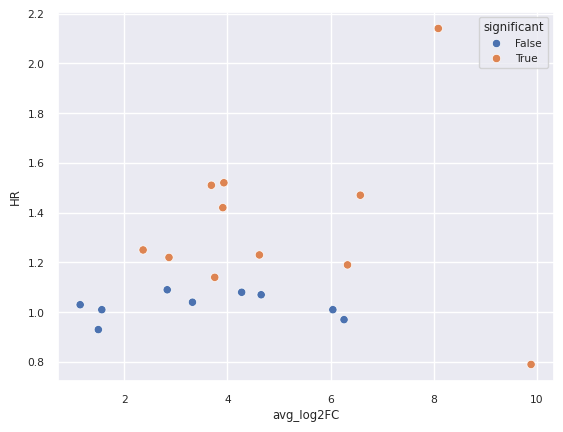

In [57]:
# An example correlation between HR and avg_log2FC
cell_type = "type I pneumocyte"
lung_cell_ex = max_avg_log2fc[max_avg_log2fc["cell_type"] == cell_type]

plt.figure()
sns.scatterplot(data=lung_cell_ex, x="avg_log2FC", y="HR", hue="significant")
plt.show()